In [ ]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import theano

from scipy import stats
from sklearn.metrics import mean_squared_error
import math

import matplotlib.pyplot as plt
import arviz as az

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
d = pd.read_csv('./data/Wines2012.csv', header=0, sep=';')
d.head()

,judge,flight,wine,score,wine.amer,judge.amer
0,Jean-M Cardebat,white,A1,10.0,1,0
1,Jean-M Cardebat,white,B1,13.0,1,0
2,Jean-M Cardebat,white,C1,14.0,0,0
3,Jean-M Cardebat,white,D1,15.0,0,0
4,Jean-M Cardebat,white,E1,8.0,1,0


In [ ]:
d.shape

(180, 6)

In [ ]:
d["score_scale"] = (d["score"] - d["score"].mean()) / d["score"].std()

## Exercise 1

In [ ]:
judge_idx = pd.Categorical(d.judge).codes
wine_idx = pd.Categorical(d.wine).codes

In [ ]:
with pm.Model() as m1:
    # Prior
    aj = pm.Normal("aj", 0, 1, shape=d.judge.nunique())
    aw = pm.Normal("aw", 0, 1, shape=d.wine.nunique())
    sigma = pm.Exponential("sigma", 1)
    # Regression
    mu = aj[judge_idx] + aw[wine_idx]
    score_hat = pm.Normal("score", mu, sigma, observed=d.score_scale)
    # Sampling
    prior_m1 = pm.sample_prior_predictive()
    trace_m1 = pm.sample()
    posterior_m1 = pm.sample_posterior_predictive(trace_m1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, aw, aj]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


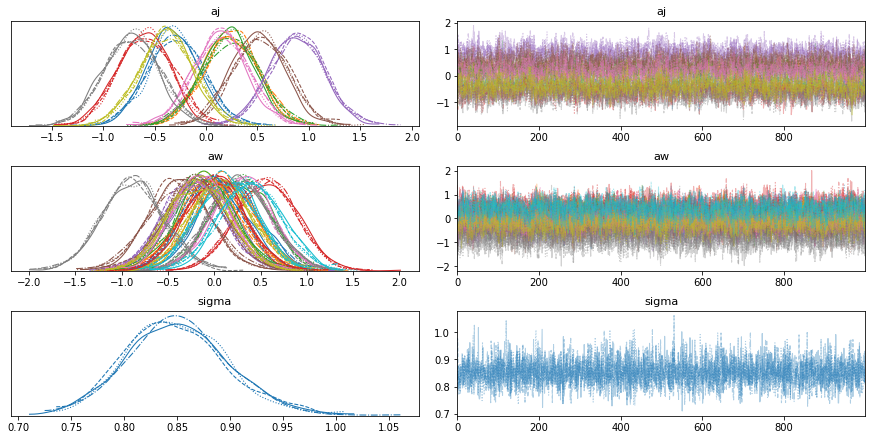

In [ ]:
pm.traceplot(trace_m1);

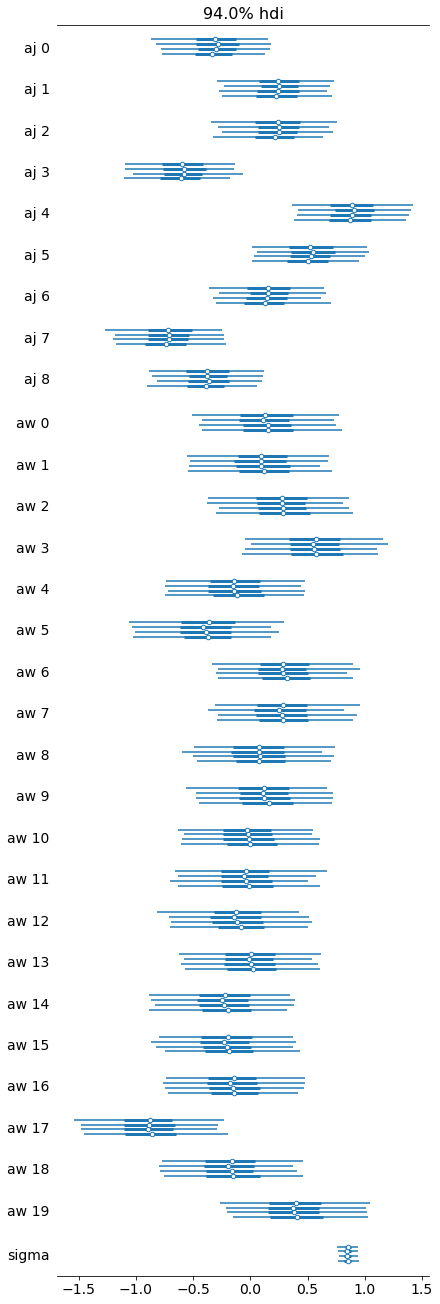

In [ ]:
pm.forestplot(trace_m1);

## Exercise 2

In [ ]:
d.head()

,judge,flight,wine,score,wine.amer,judge.amer,score_scale
0,Jean-M Cardebat,white,A1,10.0,1,0,-1.576604
1,Jean-M Cardebat,white,B1,13.0,1,0,-0.450458
2,Jean-M Cardebat,white,C1,14.0,0,0,-0.075076
3,Jean-M Cardebat,white,D1,15.0,0,0,0.300306
4,Jean-M Cardebat,white,E1,8.0,1,0,-2.327368


In [ ]:
d["judge.amer"].nunique(), d["wine.amer"].nunique(), d["flight"].nunique()

(2, 2, 2)

In [ ]:
flight_idx = pd.Categorical(d.flight).codes
amer_widx = pd.Categorical(d["wine.amer"]).codes
amer_jidx = pd.Categorical(d["judge.amer"]).codes

In [ ]:
with pm.Model() as m2:
    # Prior
    af2 = pm.Normal("af2", 0, 1, shape=d["flight"].nunique())
    aj2 = pm.Normal("aj2", 0, 1, shape=d["judge.amer"].nunique())
    aw2 = pm.Normal("aw2", 0, 1, shape=d["wine.amer"].nunique())
    sigma = pm.Exponential("sigma", 1)
    # Regression
    mu = af2[flight_idx] + aj2[amer_jidx] + aw2[amer_widx]
    score_hat = pm.Normal("score", mu, sigma, observed=d.score_scale)
    # Sampling
    prior_m2 = pm.sample_prior_predictive()
    trace_m2 = pm.sample()
    posterior_m2 = pm.sample_posterior_predictive(trace_m2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, aw2, aj2, af2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [ ]:
az.summary(trace_m2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
af2[0],0.013,0.581,-1.006,1.196,0.015,0.011,1551.0,1306.0,1564.0,1615.0,1.0
af2[1],0.014,0.575,-1.019,1.138,0.015,0.011,1565.0,1322.0,1575.0,1789.0,1.0
aj2[0],-0.105,0.577,-1.180,0.983,0.014,0.011,1771.0,1397.0,1766.0,1928.0,1.0
aj2[1],0.142,0.579,-0.897,1.271,0.014,0.011,1769.0,1518.0,1765.0,1852.0,1.0
aw2[0],0.069,0.576,-1.061,1.108,0.014,0.010,1655.0,1560.0,1659.0,1658.0,1.0
aw2[1],-0.124,0.573,-1.151,1.020,0.014,0.011,1640.0,1434.0,1642.0,1624.0,1.0
sigma,1.001,0.052,0.907,1.099,0.001,0.001,2844.0,2844.0,2830.0,2448.0,1.0


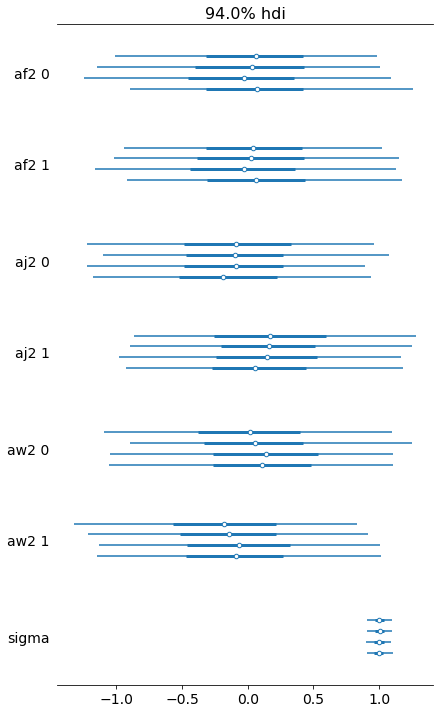

In [ ]:
pm.forestplot(trace_m2);

## Exercise 3

In [ ]:
with pm.Model() as m2:
    # Prior
    af2 = pm.Normal("af2", 0, 1, shape=d["flight"].nunique())
    aj2 = pm.Normal("aj2", 0, 1, shape=d["judge.amer"].nunique())
    aw2 = pm.Normal("aw2", 0, 1, shape=d["wine.amer"].nunique())
    sigma = pm.Exponential("sigma", 1)
    # Regression
    mu = af2[flight_idx] + aj2[amer_jidx] + aw2[amer_widx]
    score_hat = pm.Normal("score", mu, sigma, observed=d.score_scale)
    # Sampling
    prior_m2 = pm.sample_prior_predictive()
    trace_m2 = pm.sample()
    posterior_m2 = pm.sample_posterior_predictive(trace_m2)